In [1]:
from pythtb import TBModel, Lattice
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define lattice vectors
lat_vecs = [[1, 0], [1 / 2, np.sqrt(3) / 2]]
# define coordinates of orbitals
orb_vecs = [[1 / 3, 1 / 3], [2 / 3, 2 / 3]]
lat = Lattice(lat_vecs, orb_vecs, periodic_dirs=...)

# make two dimensional tight-binding graphene model
my_model = TBModel(lat)

# set model parameters
delta = 0.0
t = -1.0

# set on-site energies
my_model.set_onsite([-delta, delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])

print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
periodic directions         = [0, 1]
spinful                     = False
number of spin components   = 1
number of electronic states = 2
number of orbitals          = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000,  0.000]
  # 1 ===> [ 0.500,  0.866]
Volume of unit cell (Cartesian) = 0.866 [A^d]

Reciprocal lattice vectors (Cartesian):
  # 0 ===> [ 6.283, -3.628]
  # 1 ===> [ 0.000,  7.255]
Volume of reciprocal unit cell = 45.586 [A^-d]

Orbital vectors (Cartesian):
  # 0 ===> [ 0.500,  0.289]
  # 1 ===> [ 1.000,  0.577]

Orbital vectors (fractional):
  # 0 ===> [ 0.333,  0.333]
  # 1 ===> [ 0.667,  0.667]
----------------------------------------
Site energies:
  < 0 | H | 0 > = -0.000 
  < 1 | H | 1 > =  0.000 
Hoppings:
  < 0 | H | 1  + [ 0.0 ,  0.0 ] > = -1.0000+0.0000j
  < 1 | H | 0  + [ 1.0 , 

In [3]:
k_nodes = [[0, 0], [2 / 3, 1 / 3], [1 / 2, 1 / 2], [0, 0]]
k_node_labels = (r"$\Gamma $", r"$K$", r"$M$", r"$\Gamma $")
nk = 121

k_path, k_dist, k_node_dist = my_model.k_path(k_nodes, nk)

In [4]:
evals = my_model.solve_ham(k_path)

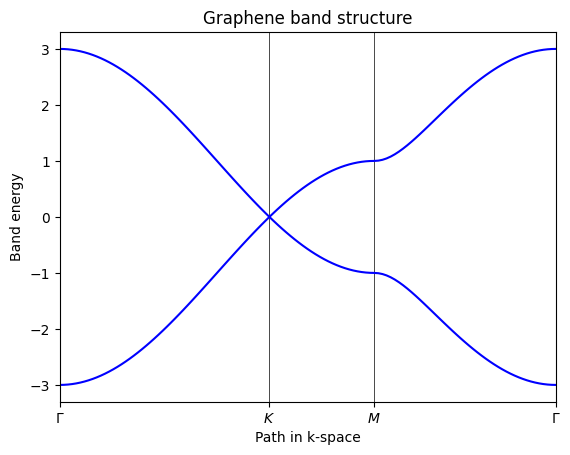

In [5]:
fig, ax = plt.subplots()

ax.set_xlim(k_node_dist[0], k_node_dist[-1])
ax.set_xticks(k_node_dist)
ax.set_xticklabels(k_node_labels)

for n in range(len(k_node_dist)):
    ax.axvline(x=k_node_dist[n], linewidth=0.5, color="k")

ax.set_title("Graphene band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot bands
ax.plot(k_dist, evals, c="b")
plt.show()

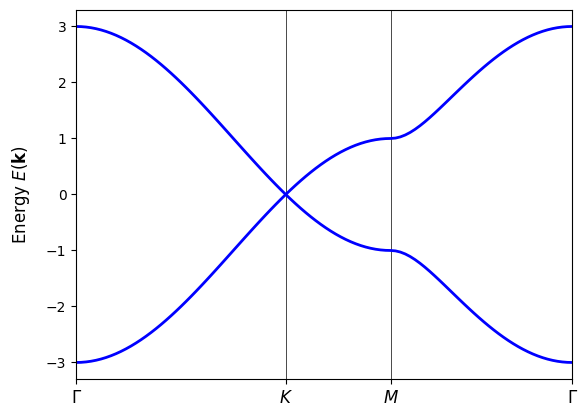

In [6]:
my_model.plot_bands(k_nodes, k_node_labels)
plt.show()